# 🎯 Task 2.3: Target Variable Analysis

**Objective**: Analyze the distribution and properties of the target variables (PHQ-9, GPA, etc.) to understand the prediction targets.

## 1. Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plot style for better aesthetics
sns.set_theme(style="whitegrid", palette="viridis", context="talk")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

# Data path
DATA_DIR = Path("../../data/raw/dataset")

## 2. PHQ-9 (Depression) Analysis
**File**: `survey/PHQ-9.csv`
**Questions**:
- What is the distribution of PHQ-9 scores?
- How do scores change from pre-term to post-term?

PHQ-9 Data Shape: (84, 12)
   uid type Little interest or pleasure in doing things  \
0  u00  pre                                  Not at all   
1  u01  pre                                Several days   
2  u02  pre                     More than half the days   
3  u03  pre                                  Not at all   
4  u04  pre                                Several days   

  Feeling down, depressed, hopeless.  \
0                       Several days   
1                       Several days   
2                       Several days   
3                       Several days   
4                       Several days   

  Trouble falling or staying asleep, or sleeping too much.  \
0                                         Not at all         
1                                       Several days         
2                            More than half the days         
3                                         Not at all         
4                                         Not at all         

  Fe

C:\Users\abhay.ahirkar\AppData\Local\Temp\ipykernel_18064\2811937604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=phq9_df, x='type', palette="viridis")


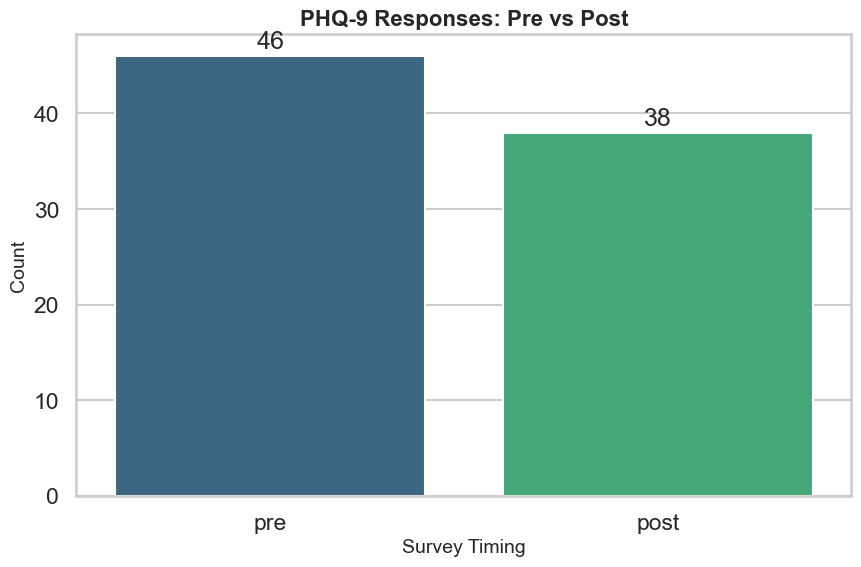

In [2]:
# Load PHQ-9 (Depression) Data
phq9_path = DATA_DIR / "survey/PHQ-9.csv"
if phq9_path.exists():
    phq9_df = pd.read_csv(phq9_path, index_col=False)
    print(f"PHQ-9 Data Shape: {phq9_df.shape}")
    print(phq9_df.head())
    
    # Pre-post analysis if 'type' column exists (pre/post)
    if 'type' in phq9_df.columns:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=phq9_df, x='type', palette="viridis")
        plt.title("PHQ-9 Responses: Pre vs Post", fontweight='bold')
        plt.xlabel("Survey Timing")
        plt.ylabel("Count")
        
        # Add labels
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
        plt.show()
        
else:
    print(f"File not found: {phq9_path}")

## 3. GPA Analysis
**File**: `education/grades.csv` (or similar)
**Questions**:
- What is the distribution of GPAs?
- Is there a correlation between pre-term and post-term GPA?

Grades Data Shape: (30, 4)
   uid   gpa all   gpa 13s   cs 65
0  u01     2.863  1.777778     3.0
1  u02     3.505  4.000000     4.0
2  u04     3.029  3.500000     4.0
3  u05     3.679  3.777778     4.0
4  u07     3.474  4.000000     4.0


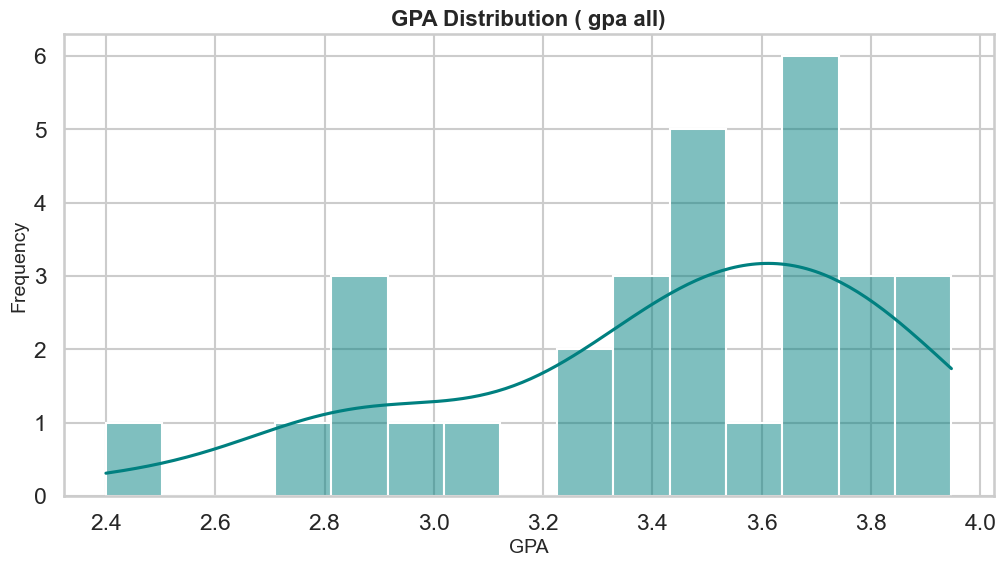

In [3]:
# Load GPA/Education Data
# Note: File name might vary, checking common names
grades_path = DATA_DIR / "education/grades.csv"
if not grades_path.exists():
     grades_path = DATA_DIR / "education/Grades.csv"

if grades_path.exists():
    grades_df = pd.read_csv(grades_path, index_col=False)
    print(f"Grades Data Shape: {grades_df.shape}")
    print(grades_df.head())
    
    # Plot GPA distribution if 'gpa' column exists
    # Adapting to likely column names
    gpa_col = next((col for col in grades_df.columns if 'gpa' in col.lower()), None)
    if gpa_col:
        plt.figure(figsize=(12, 6))
        sns.histplot(grades_df[gpa_col], kde=True, bins=15, color='teal')
        plt.title(f"GPA Distribution ({gpa_col})", fontweight='bold')
        plt.xlabel("GPA")
        plt.ylabel("Frequency")
        plt.show()
else:
    print(f"File not found: {grades_path}")

## 4. Flourishing Scale
**File**: `survey/FlourishingScale.csv`
**Questions**:
- How 'flourishing' is the student population?

In [4]:
# Load Flourishing Scale Data
fs_path = DATA_DIR / "survey/FlourishingScale.csv"
if fs_path.exists():
    fs_df = pd.read_csv(fs_path, index_col=False)
    print(f"Flourishing Scale Data Shape: {fs_df.shape}")
    print(fs_df.head())
else:
    print(f"File not found: {fs_path}")

Flourishing Scale Data Shape: (83, 10)
   uid type  I lead a purposeful and meaningful life  \
0  u00  pre                                        7   
1  u01  pre                                        4   
2  u02  pre                                        6   
3  u03  pre                                        6   
4  u04  pre                                        3   

   My social relationships are supportive and rewarding  \
0                                                  6      
1                                                  6      
2                                                  7      
3                                                  2      
4                                                  5      

   I am engaged and interested in my daily activities  \
0                                                NaN    
1                                                6.0    
2                                                5.0    
3                                        